In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Exploratory analysis

In [9]:
df.isnull().sum()[df.isnull().sum() >= len(df)*0.2]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [10]:
null_fracs = df.isnull().sum()[df.isnull().sum() >= len(df)*0.2]/len(df)
null_fracs = list(zip(null_fracs.index, round(null_fracs, 3)))
null_fracs

[('Alley', 0.938),
 ('FireplaceQu', 0.473),
 ('PoolQC', 0.995),
 ('Fence', 0.808),
 ('MiscFeature', 0.963)]

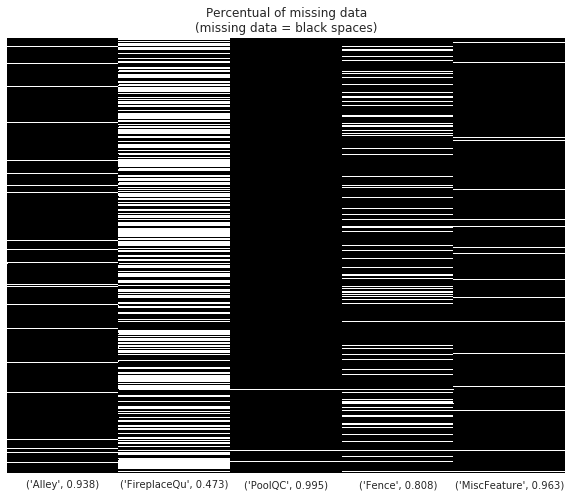

In [11]:
null_cols = df.isnull().sum()[df.isnull().sum() >= len(df)*0.3].index

plt.figure(figsize = (10, 8))
sns.heatmap(df[null_cols].isnull(), yticklabels=False, cbar=False, cmap='CMRmap_r', xticklabels=null_fracs)
plt.title('Percentual of missing data\n(missing data = black spaces)');

In [12]:
df_full = df.drop(null_cols, axis=1)

In [13]:
df_full.set_index('Id', drop=True, inplace=True)

In [14]:
high_corr_features = df_full.corr()['SalePrice'][abs(df_full.corr()['SalePrice']) > 0.3]

In [15]:
df_filtered = df_full[high_corr_features.index]

## Dealing with NaNs

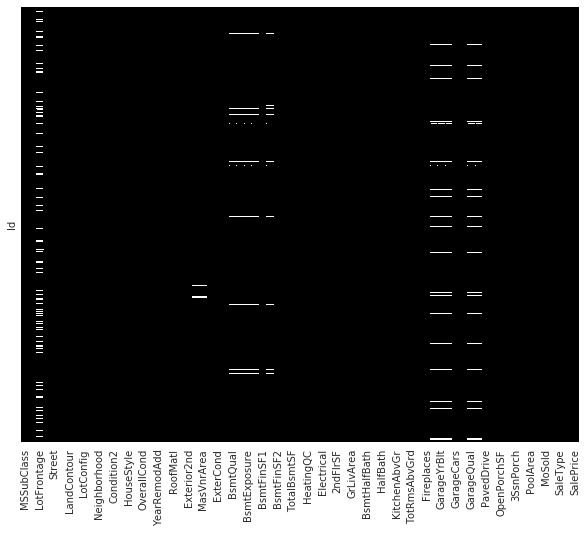

In [16]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_full.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

In [50]:
df_filled = df_filtered.apply(lambda x: x.fillna(np.nanmedian(x)))

In [51]:
df_new = pd.concat([df_full.drop(df_filled.columns, axis=1), df_filled], axis=1)

In [52]:
df_new.drop(df_new.isnull().sum()[df_new.isnull().sum() > 0].index, axis=1, inplace=True)

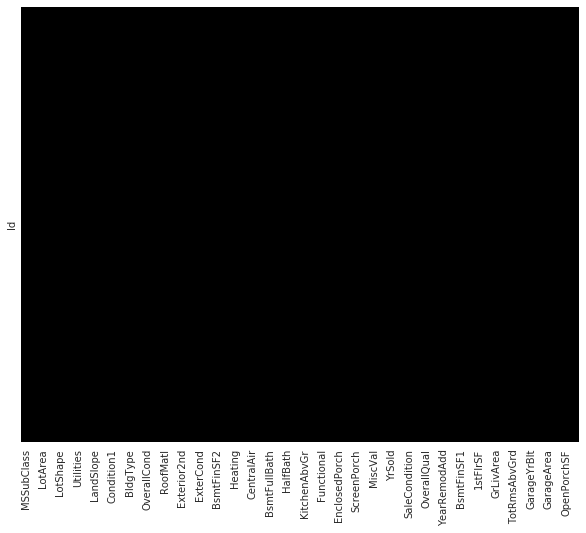

In [53]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_new.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

# Label Encoding

In [163]:
obj = df_new.dtypes[df_new.dtypes == object].index

In [164]:
df_new.dtypes[df_new.dtypes == object]

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
KitchenQual      object
Functional       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le = LabelEncoder()

In [167]:
for i in obj:
    df_new[i] = le.fit_transform(df_new[i])

In [168]:
df_new

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,...,1710,2,8,0,2003.0,2,548,0,61,208500
2,20,3,9600,1,3,3,0,2,0,24,...,1262,2,6,1,1976.0,2,460,298,0,181500
3,60,3,11250,1,0,3,0,4,0,5,...,1786,2,6,1,2001.0,2,608,0,42,223500
4,70,3,9550,1,0,3,0,0,0,6,...,1717,1,7,1,1998.0,3,642,0,35,140000
5,60,3,14260,1,0,3,0,2,0,15,...,2198,2,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,7917,1,3,3,0,4,0,8,...,1647,2,7,1,1999.0,2,460,0,40,175000
1457,20,3,13175,1,3,3,0,4,0,14,...,2073,2,7,2,1978.0,2,500,349,0,210000
1458,70,3,9042,1,3,3,0,4,0,6,...,2340,2,9,2,1941.0,1,252,0,60,266500


# One-hot Encoding

In [46]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(categories='auto')

# encoded_df = pd.DataFrame([])

# for i in obj:
#     encoded_data = ohe.fit_transform(df_new[[i]]).toarray()
#     encoded_labels = np.array(ohe.categories_, dtype=object).ravel()

#     encoded_df = pd.concat([encoded_df, pd.DataFrame(encoded_data, columns=encoded_labels)], axis=1)

# encoded_df.set_index(df_new.drop(obj, axis=1).index, inplace = True)

# df_ready = pd.concat([df_new.drop(obj, axis=1), encoded_df], axis=1)

# Separating inputs, output, train and test

In [169]:
y = df_new['SalePrice']
X = df_new.drop('SalePrice', axis=1)

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
preds = lm.predict(X_test)

## Evaluating predictions

In [34]:
err = y_test - preds

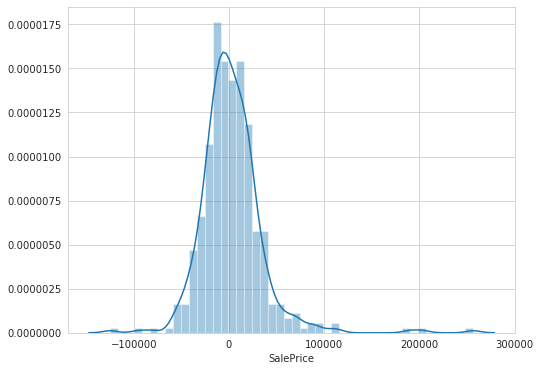

In [35]:
# residual error distribution
plt.figure(figsize = (8, 6))
sns.distplot(err)

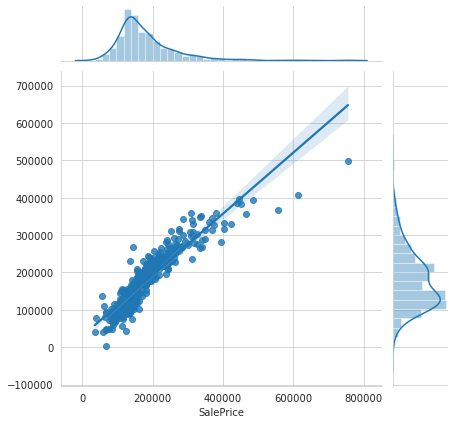

In [36]:
sns.jointplot(y_test, preds, kind='reg')

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

In [39]:
print('R2:', round(r2, 2))
print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))

R2: 0.84
MAE: 21922.39
MSE: 1090640153.49
RMSE: 33024.84


# Random Forest Regressor

In [172]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

## Evaluating predictions

In [173]:
err = y_test - y_pred

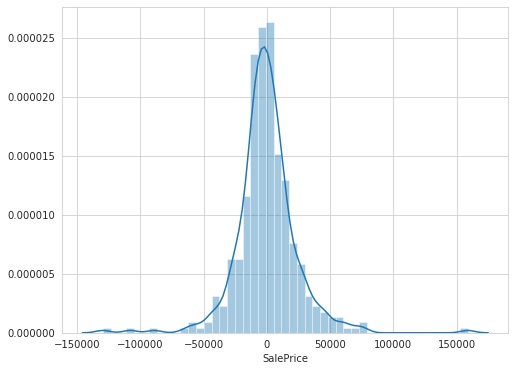

In [174]:
# residual error distribution
plt.figure(figsize = (8, 6))
sns.distplot(err)

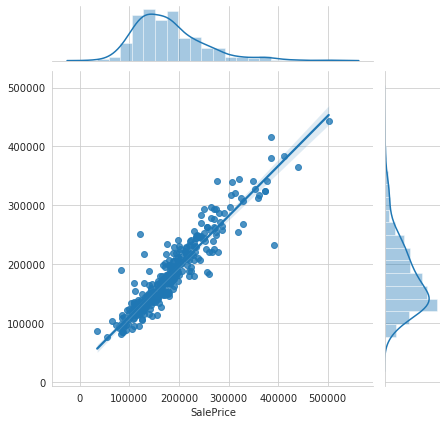

In [175]:
sns.jointplot(y_test, y_pred, kind='reg', )

In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('R2:', round(r2, 2))
print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))

R2: 0.88
MAE: 16085.75
MSE: 584599426.13
RMSE: 24178.49


# Using AutoML

In [177]:
from h2o import init, H2OFrame, save_model, load_model, deep_copy
from h2o.automl import H2OAutoML

In [180]:
init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_252"; OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~16.04-b09); OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
  Starting server from /home/luan/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfg4708n7
  JVM stdout: /tmp/tmpfg4708n7/h2o_luan_started_from_python.out
  JVM stderr: /tmp/tmpfg4708n7/h2o_luan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/Fortaleza
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,4 months and 7 days !!!
H2O_cluster_name:,H2O_from_python_luan_fkbrzc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.710 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [246]:
train = pd.concat([X_train, y_train], axis=1)
train = H2OFrame(train)
test = pd.concat([X_test, y_test], axis=1)
test = H2OFrame(test)

# Identify predictors and response
x_cols = list(X_train)
y_col = y_train.name

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [247]:
# # para criar, treinar e salvar novos modelos, rodar as linhas abaixo
# aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=1800, verbosity='info')
# aml.train(x=x_cols, y=y_col, training_frame=train)

# # Salvando modelo
# overwrite = True
# model_path = save_model(model=aml.leader, path='saved_models/', force=overwrite)

AutoML progress: |
00:37:54.525: Project: AutoML_20200811_03754524
00:37:54.525: Setting stopping tolerance adaptively based on the training frame: 0.031280562354492725
00:37:54.525: Build control seed: 1
00:37:54.525: training frame: Frame key: automl_training_Key_Frame__upload_92de50585e49e772ff768a2e845740a7.hex    cols: 19    rows: 1022  chunks: 1    size: 34044  checksum: 1826384414528129280
00:37:54.525: validation frame: NULL
00:37:54.526: leaderboard frame: NULL
00:37:54.526: blending frame: NULL
00:37:54.526: response column: SalePrice
00:37:54.526: fold column: null
00:37:54.526: weights column: null
00:37:54.526: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
00:37:54.527: AutoML job created: 2020.08.11 00:37:54.524
00:37:54.528: AutoML build sta

In [249]:
from pathlib import Path

# load model
path = str(Path.cwd()) + '/saved_models/GBM_3_AutoML_20200811_003754'
model = load_model(path)

In [250]:
preds = model.predict(test[x_cols])

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [251]:
test = test[y_col].as_data_frame()
preds = preds.as_data_frame()

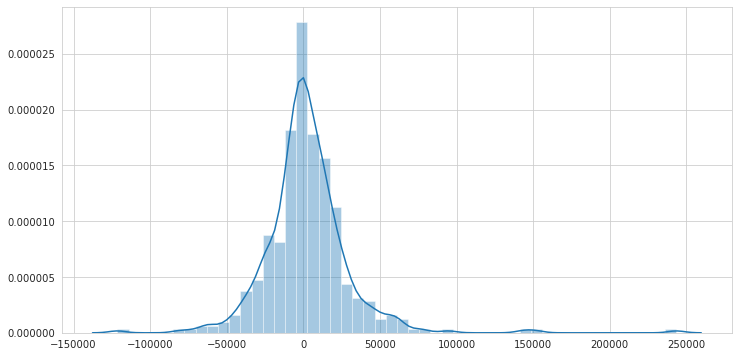

In [252]:
plt.figure(figsize = (12, 6))
err = test.values - preds.values
sns.distplot(err)

In [253]:
from sklearn.metrics import r2_score, mean_squared_error

print('r² score:', round(r2_score(test, preds), 2))

# Calculate the absolute errors
errors = abs(preds.values - test.values)
mae = round(np.mean(errors), 2)
mse = round(mean_squared_error(test, preds), 2)
rmse = round(np.sqrt(mse), 2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

r² score: 0.89
Mean Absolute Error: 18007.2
MSE: 793253062.15
RMSE: 28164.75


# Testing

In [177]:
df_test = pd.read_csv('test.csv')

In [178]:
df_test.set_index('Id', inplace=True)

In [179]:
#X_test = df_test[high_corr_features.index.drop('SalePrice')]
X_test = df_test[df_new.columns.drop('SalePrice')]

### Encoding

In [186]:
obj = X_test.dtypes[X_test.dtypes == object].index

from sklearn.preprocessing import LabelEncoder

X_test[obj] = X_test[obj].fillna(method='bfill')

le = LabelEncoder()

for i in obj:
    X_test[i] = le.fit_transform(X_test[i])

### Dealing with NaNs

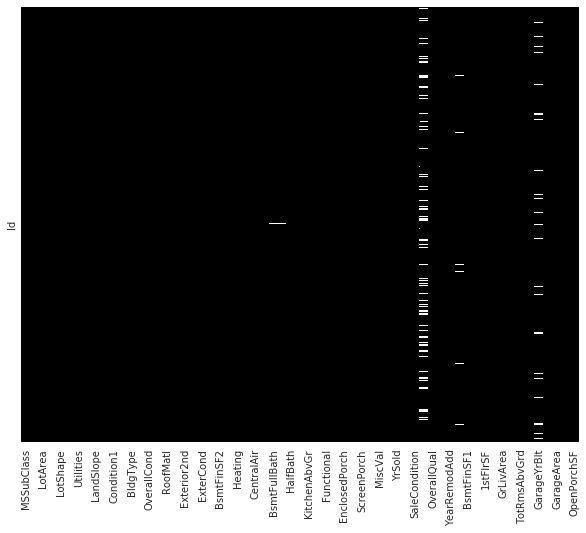

In [187]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_test.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

In [188]:
X_test_filled = X_test.drop(obj, axis=1).apply(lambda x: x.fillna(np.nanmedian(x)))

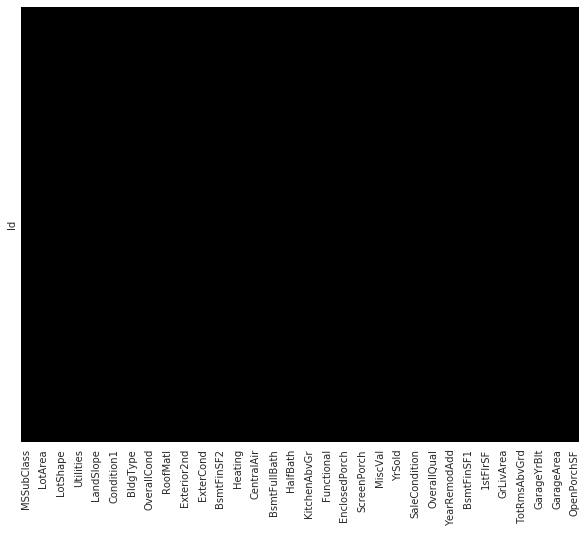

In [189]:
plt.figure(figsize = (10, 8))
sns.heatmap(X_test_filled.isnull(), yticklabels=False, cbar=False, cmap='CMRmap')

In [190]:
y_pred = rfr.predict(X_test_filled)

In [191]:
cols = ('Id', 'SalePrice')

In [192]:
results = pd.DataFrame(list(zip(np.array(X_test_filled.index), y_pred)), columns=cols)

In [193]:
results.to_csv('house_prices_submission.csv', index=False)

In [194]:
pd.read_csv('house_prices_submission.csv')

,Id,SalePrice
0,1461,129337.91
1,1462,152895.84
2,1463,172174.20
3,1464,185689.32
4,1465,203661.75
...,...,...
1454,2915,84885.50
1455,2916,83869.71
1456,2917,150878.77
1457,2918,114993.00
